<a href="https://colab.research.google.com/github/Ebasurtos/AHPC/blob/main/AHPC_PD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Práctica Dirigida 2**

*   Jorge Luis Palacios Chilo
*   Eder Basurto Siuce

 **1) Ejecute el código adjunto (Kmeans mpi.py, Kmeans mpi.sh) para
 distinto número de procesos (p=1,2,4,8,16,32), y número de datos
 de muestra, dado por el parámetro n values (32768, 65536, 131072,
 262144, 524288, 1048576) y genere las gráficas de tiempo de
 ejecución correspondientes (3 pts)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargamos los datos de las ejecuciones
df = pd.read_csv('/content/drive/MyDrive/Ciclo IV/AHPC/PD02/PD2.csv', sep=';')
df['time'] = df['tcomp'] + df['tcomm']
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Ciclo IV/AHPC/PD02/PD2.csv'

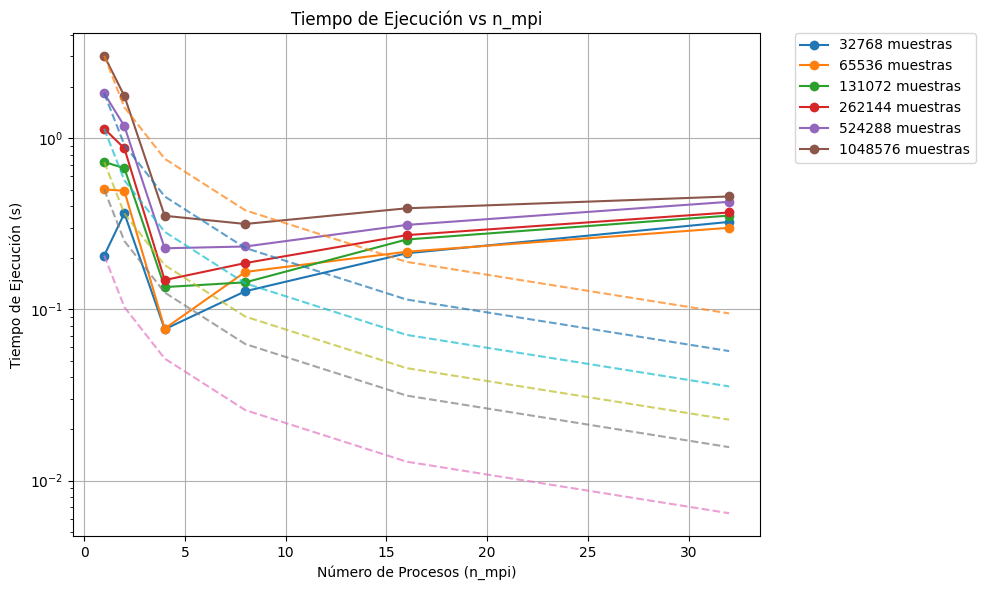

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y ejes ANTES de graficar
fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Si solo quieres un subplot
# O si quieres mantener la estructura con múltiples subplots:
# fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Tu código de graficación (modificado para usar axes en lugar de axes[0])
for samples in df['n_samples'].unique():
    subset = df[df['n_samples'] == samples]
    axes.plot(subset['n_mpi'], subset['time'], marker='o', label=f'{samples} muestras')

# Agregar línea teórica T = 1/p
n_jobs_range = df['n_mpi'].unique()
n_jobs_range_sorted = np.sort(n_jobs_range)

# Para cada tamaño de muestra, calcular y graficar la línea teórica
for samples in df['n_samples'].unique():
    subset = df[df['n_samples'] == samples]
    t1 = subset[subset['n_mpi'] == 1]['time'].iloc[0]  # Tiempo con 1 worker
    theoretical_times = t1 / n_jobs_range_sorted  # T = T1 / p
    axes.plot(n_jobs_range_sorted, theoretical_times, '--', alpha=0.7)



axes.set_xlabel('Número de Procesos (n_mpi)')
axes.set_ylabel('Tiempo de Ejecución (s)')
axes.set_yscale('log')
axes.set_title('Tiempo de Ejecución vs n_mpi')
axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

**2) Compare gráficamente los resultados con la expresión teórica de
 complejidad en paralelo. Debe superponer la curva teorica (página
 anterior) a la experimental encontrando los factores de
 proporcionalidad que conviertan la expresión bigO en tiempos de
 ejecución en segundos (3 pts)**

Para 32768 muestras: k1 = 0.2646, k2 = 0.0760
Para 65536 muestras: k1 = 0.5467, k2 = 0.0665
Para 131072 muestras: k1 = 0.7869, k2 = 0.0723
Para 262144 muestras: k1 = 1.1832, k2 = 0.0668
Para 524288 muestras: k1 = 1.8411, k2 = 0.0634
Para 1048576 muestras: k1 = 3.0129, k2 = 0.0494


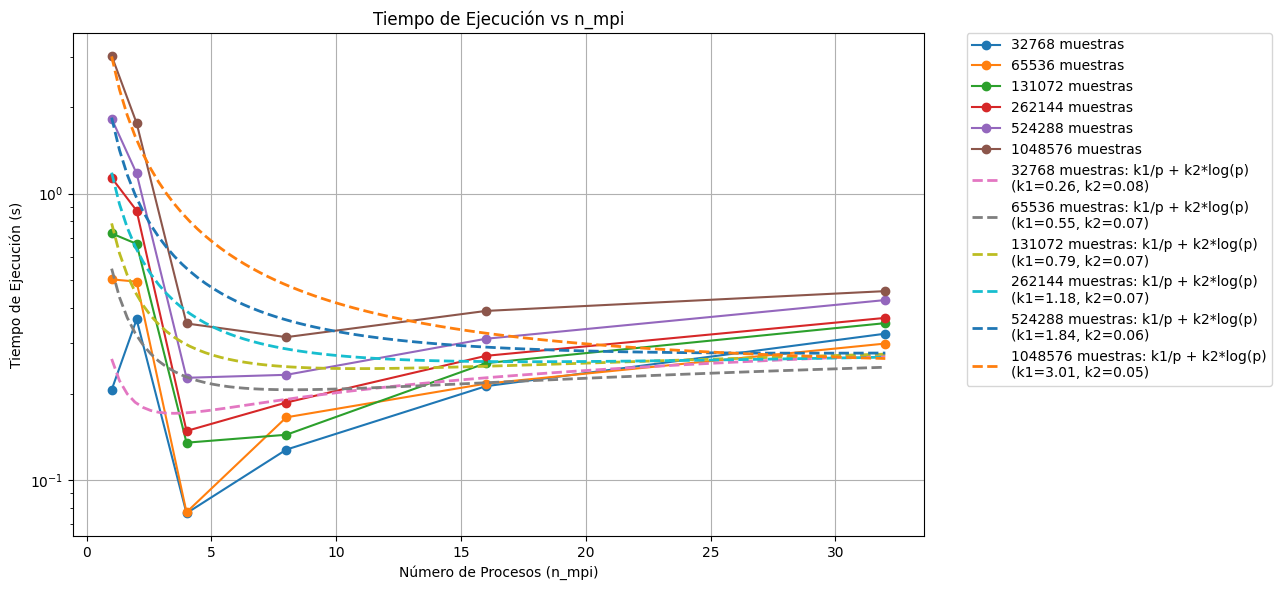

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Crear figura y ejes - hacer la figura más ancha para acomodar la leyenda
fig, axes = plt.subplots(1, 1, figsize=(13, 6))  # Más ancho para la leyenda

for samples in df['n_samples'].unique():
    subset = df[df['n_samples'] == samples]
    axes.plot(subset['n_mpi'], subset['time'], marker='o', label=f'{samples} muestras')

# Agregar línea teórica T = 1/p
#n_jobs_range = result_df['n_mpi'].unique()
#n_jobs_range_sorted = np.sort(n_jobs_range)

#for samples in result_df['n_samples'].unique():
#    subset = result_df[result_df['n_samples'] == samples]
#    t1 = subset[subset['n_mpi'] == 1]['time'].iloc[0]
#    theoretical_times = t1 / n_jobs_range_sorted
#    axes.plot(n_jobs_range_sorted, theoretical_times, '--', alpha=0.7)

#Ajuste automático para k1 y k2
def theoretical_model(p, k1, k2):
    return k1/p + k2*np.log(p)

# Para cada tamaño de muestra, ajustar el modelo
for samples in df['n_samples'].unique():
    subset = df[df['n_samples'] == samples]

    # Preparar datos para el ajuste
    x_data = subset['n_mpi'].values
    y_data = subset['time'].values

    # Ajustar el modelo a los datos
    try:
        # Valores iniciales para k1 y k2
        initial_guess = [y_data[0], 0.1]  # k1 ≈ tiempo con 1 proceso, k2 pequeño

        # Realizar el ajuste
        popt, pcov = curve_fit(theoretical_model, x_data, y_data, p0=initial_guess)
        k1_opt, k2_opt = popt

        # Generar curva con parámetros optimizados
        p_values = np.linspace(min(x_data), max(x_data), 100)
        model_times = theoretical_model(p_values, k1_opt, k2_opt)

        # Graficar el modelo ajustado
        axes.plot(p_values, model_times, '--', linewidth=2,
                 label=f'{samples} muestras: k1/p + k2*log(p)\n(k1={k1_opt:.2f}, k2={k2_opt:.2f})')

        print(f"Para {samples} muestras: k1 = {k1_opt:.4f}, k2 = {k2_opt:.4f}")

    except Exception as e:
        print(f"Error en el ajuste para {samples} muestras: {e}")

axes.set_xlabel('Número de Procesos (n_mpi)')
axes.set_ylabel('Tiempo de Ejecución (s)')
axes.set_yscale('log')
axes.set_title('Tiempo de Ejecución vs n_mpi')

# LEYENDA FUERA DEL GRÁFICO (A LA DERECHA)
axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

axes.grid(True)

# Ajustar el layout para que no se corte la leyenda
plt.tight_layout()
plt.show()

Para 32768 muestras: k1 = 0.2646, k2 = 0.0760
Para 65536 muestras: k1 = 0.5467, k2 = 0.0665
Para 131072 muestras: k1 = 0.7869, k2 = 0.0723
Para 262144 muestras: k1 = 1.1832, k2 = 0.0668
Para 524288 muestras: k1 = 1.8411, k2 = 0.0634
Para 1048576 muestras: k1 = 3.0129, k2 = 0.0494


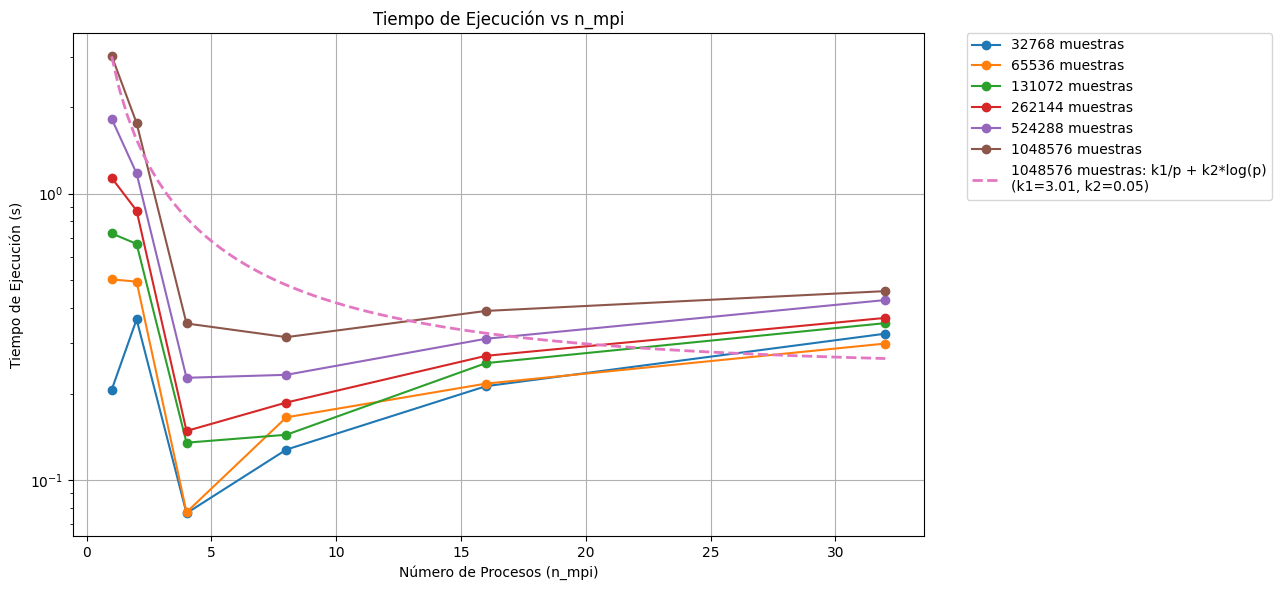

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Crear figura y ejes - hacer la figura más ancha para acomodar la leyenda
fig, axes = plt.subplots(1, 1, figsize=(13, 6))  # Más ancho para la leyenda

# Graficar TODOS los datos experimentales (líneas sólidas)
for samples in df['n_samples'].unique():
    subset = df[df['n_samples'] == samples]
    axes.plot(subset['n_mpi'], subset['time'], marker='o', label=f'{samples} muestras')

# Ajuste automático para k1 y k2
def theoretical_model(p, k1, k2):
    return k1/p + k2*np.log(p)

# Para cada tamaño de muestra, ajustar el modelo pero SOLO GRAFICAR para 1048576
target_samples = 1048576  # El tamaño de muestra específico que quieres mostrar

for samples in df['n_samples'].unique():
    subset = df[df['n_samples'] == samples]

    # Preparar datos para el ajuste
    x_data = subset['n_mpi'].values
    y_data = subset['time'].values

    # Ajustar el modelo a los datos
    try:
        # Valores iniciales para k1 y k2
        initial_guess = [y_data[0], 0.1]  # k1 ≈ tiempo con 1 proceso, k2 pequeño

        # Realizar el ajuste
        popt, pcov = curve_fit(theoretical_model, x_data, y_data, p0=initial_guess)
        k1_opt, k2_opt = popt

        # SOLO graficar el modelo ajustado si es el tamaño de muestra objetivo
        if samples == target_samples:
            # Generar curva con parámetros optimizados
            p_values = np.linspace(min(x_data), max(x_data), 100)
            model_times = theoretical_model(p_values, k1_opt, k2_opt)#0.09)

            # Graficar el modelo ajustado SOLO para 1048576
            axes.plot(p_values, model_times, '--', linewidth=2,
                     label=f'{samples} muestras: k1/p + k2*log(p)\n(k1={k1_opt:.2f}, k2={k2_opt:.2f})')

        print(f"Para {samples} muestras: k1 = {k1_opt:.4f}, k2 = {k2_opt:.4f}")

    except Exception as e:
        print(f"Error en el ajuste para {samples} muestras: {e}")

axes.set_xlabel('Número de Procesos (n_mpi)')
axes.set_ylabel('Tiempo de Ejecución (s)')
axes.set_yscale('log')
axes.set_title('Tiempo de Ejecución vs n_mpi')

# LEYENDA FUERA DEL GRÁFICO (A LA DERECHA)
axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

axes.grid(True)

# Ajustar el layout para que no se corte la leyenda
plt.tight_layout()
plt.show()

**3) Calcule la velocidad en FLOPS = FLOPs / Tp necesarios para resolver el  modelo planteado. Considere el calculo de FLOPs según: FLOPs = 3TNkd, con T iteraciones, N puntos, k clusters y d dimensiones. Siendo Tp el tiempo de ejecución en paralelo. Grafique FLOPs vs. p=1,2,4,8,16,32 para N=32768, 65536, 131072, 262144, 524288, 1048576 (como en el script) (3 pts)**

In [ ]:
df['flops'] = 3*df['T'] * df['n_samples'] * df['k'] * df['d']
df['gflops_tp'] =  (df['flops'] / df['time']) / 10**9 # dividimos por 10^9 para convertir a Gigaflops
df_ordenado = df.sort_values('gflops_tp', ascending=False)
df_ordenado.head(10)

,Proceso,n_samples,n_mpi,tcomp,tcomm,T,k,d,time,flops,gflops_tp
23,22144_6,1048576,8,0.169599,0.145657,7,3,2,0.315256,132120576,0.419090
17,22138_6,1048576,4,0.269972,0.081896,7,3,2,0.351868,132120576,0.375483
29,22150_6,1048576,16,0.142152,0.247083,7,3,2,0.389235,132120576,0.339437
16,22138_5,524288,4,0.147951,0.079399,7,3,2,0.227350,66060288,0.290566
35,22156_6,1048576,32,0.113301,0.343116,7,3,2,0.456417,132120576,0.289473
22,22144_5,524288,8,0.093577,0.139288,7,3,2,0.232865,66060288,0.283685
15,22138_4,262144,4,0.083789,0.064468,7,3,2,0.148257,33030144,0.222790
28,22150_5,524288,16,0.083905,0.227321,7,3,2,0.311226,66060288,0.212258
21,22144_4,262144,8,0.065799,0.120566,7,3,2,0.186365,33030144,0.177234
34,22156_5,524288,32,0.071113,0.353679,7,3,2,0.424792,66060288,0.155512


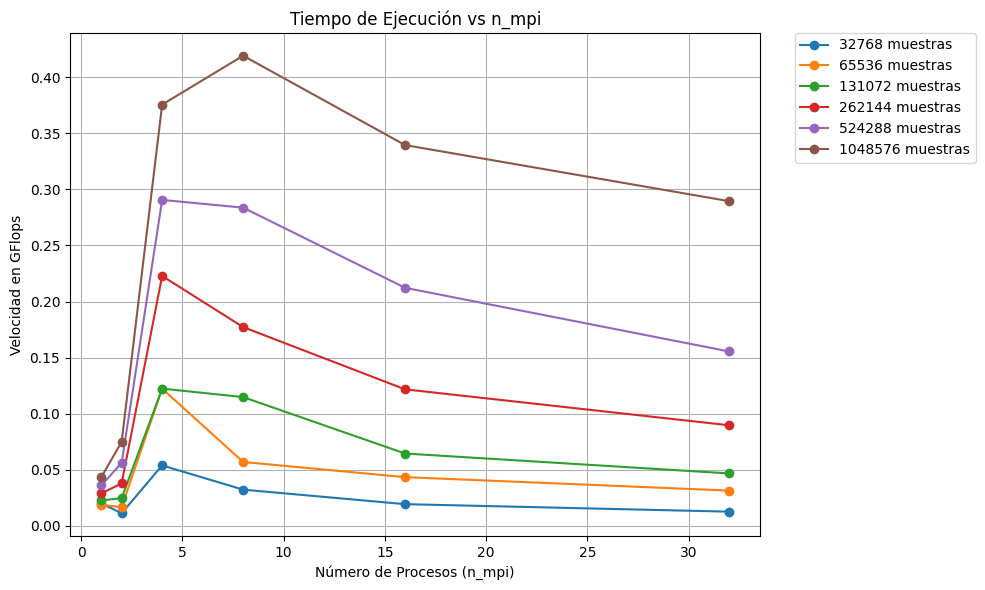

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y ejes ANTES de graficar
fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Si solo quieres un subplot
# Tu código de graficación (modificado para usar axes en lugar de axes[0])
for samples in df['n_samples'].unique():
    subset = df[df['n_samples'] == samples]
    axes.plot(subset['n_mpi'], subset['gflops_tp'], marker='o', label=f'{samples} muestras')

axes.set_xlabel('Número de Procesos (n_mpi)')
axes.set_ylabel('Velocidad en GFlops')
#axes.set_yscale('log')
axes.set_title('Tiempo de Ejecución vs n_mpi')
axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Considerando el maximo valor hallado en todas las pruebas, la La velcoidad necesaria en FLOPS es de 0.419090 GFLOPS

**4) Haga un análisis de escalabilidad fuerte basado en los resultados
 obtenidos. Teóricamente, se trata de encontrar la funcion E=f(p),
 para n constante. Experimentalmente, determinar si E se mantiene
 constante en cada curva (3 pts)**

In [ ]:
# Calcular speedup y eficiencia para cada n_samples
results = []
for samples in df['n_samples'].unique():
    subset = df[df['n_samples'] == samples].sort_values('n_mpi')
    t1 = subset[subset['n_mpi'] == 1]['time']
    if not t1.empty:
        t1 = t1.iloc[0]
        subset = subset.copy()
        subset['speedup'] = t1 / subset['time']
        subset['efficiency'] = subset['speedup'] / subset['n_mpi']
        results.append(subset)

result_df = pd.concat(results)

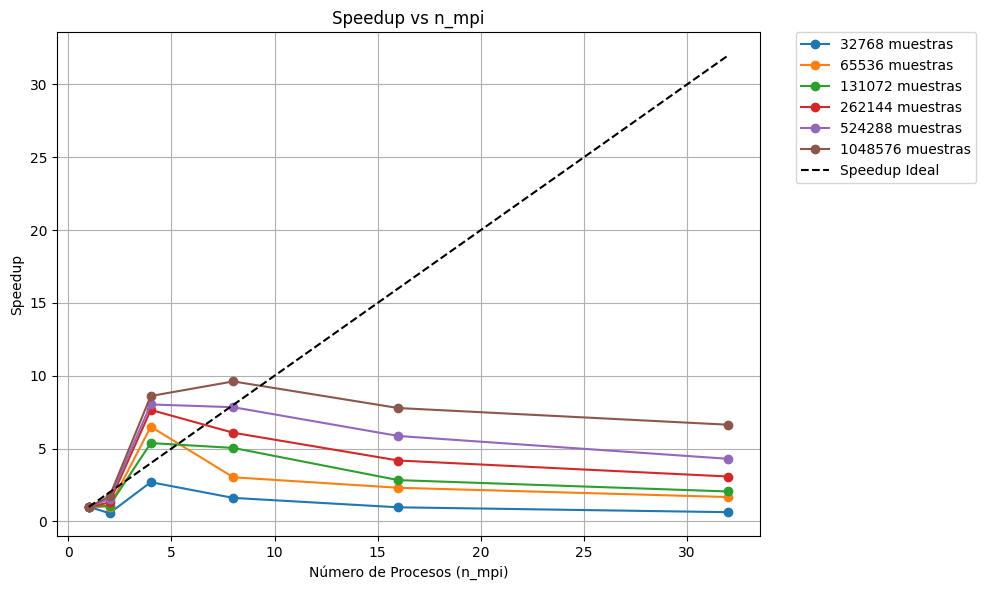

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y ejes ANTES de graficar
fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Si solo quieres un subplot
# Tu código de graficación (modificado para usar axes en lugar de axes[0])
for samples in result_df['n_samples'].unique():
    subset = result_df[result_df['n_samples'] == samples]
    axes.plot(subset['n_mpi'], subset['speedup'], marker='o', label=f'{samples} muestras')

n_jobs_range = np.sort(result_df['n_mpi'].unique())
axes.plot(n_jobs_range, n_jobs_range, 'k--', label='Speedup Ideal')

axes.set_xlabel('Número de Procesos (n_mpi)')
axes.set_ylabel('Speedup')
#axes.set_yscale('log')
axes.set_title('Speedup vs n_mpi')
axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

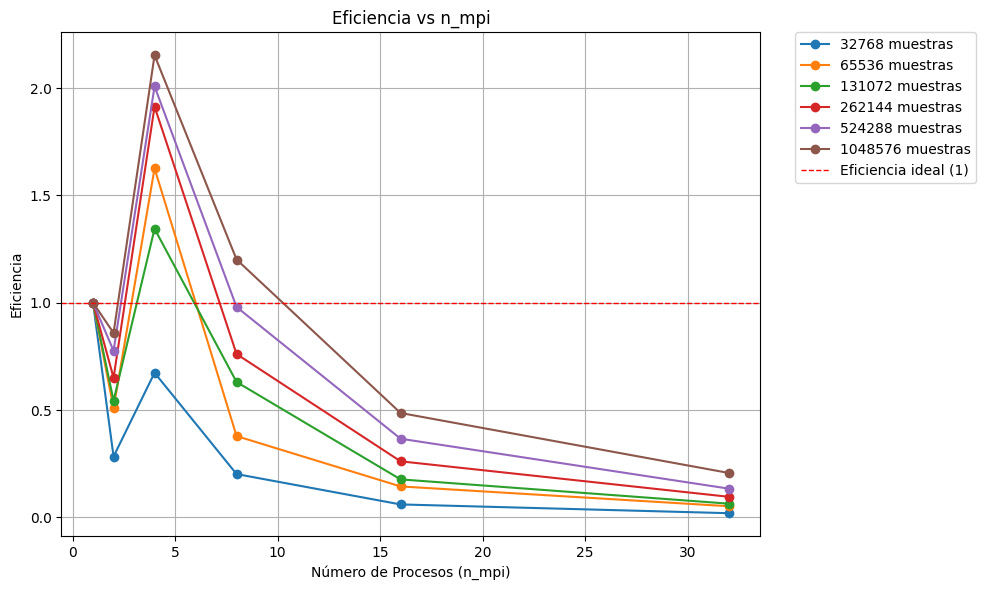

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y ejes ANTES de graficar
fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Si solo quieres un subplot
# Tu código de graficación (modificado para usar axes en lugar de axes[0])
for samples in result_df['n_samples'].unique():
    subset = result_df[result_df['n_samples'] == samples]
    axes.plot(subset['n_mpi'], subset['efficiency'], marker='o', label=f'{samples} muestras')

# Añadir línea horizontal en y=1
axes.axhline(y=1, color='r', linestyle='--', linewidth=1, label='Eficiencia ideal (1)')

axes.set_xlabel('Número de Procesos (n_mpi)')
axes.set_ylabel('Eficiencia')
#axes.set_yscale('log')
axes.set_title('Eficiencia vs n_mpi')
axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes.grid(True)

# Mostrar la gráfica
plt.tight_layout()

Para el analisis nos centraremos en la eficiencia a partir de 15 procesos, la cual presenta un ligera tendencia decreciente a mayor cantidad de muestras. Considerando lo señalado y el compartamiento de todas las curvas se puede inferir que el algoritmo presenta escalabilidad fuerte, es decir es escalable, aunque con eficiencias decrecientes a medida que se añaden más recursos para la misma carga de trabajo.

**5) Encuentre la relación teórica entre n y p para que se mantenga E
 constante (escalabilidad debil). Muestre que las curvas de
 eficiencia obtenidas siguen esta relación. (3 pts)**

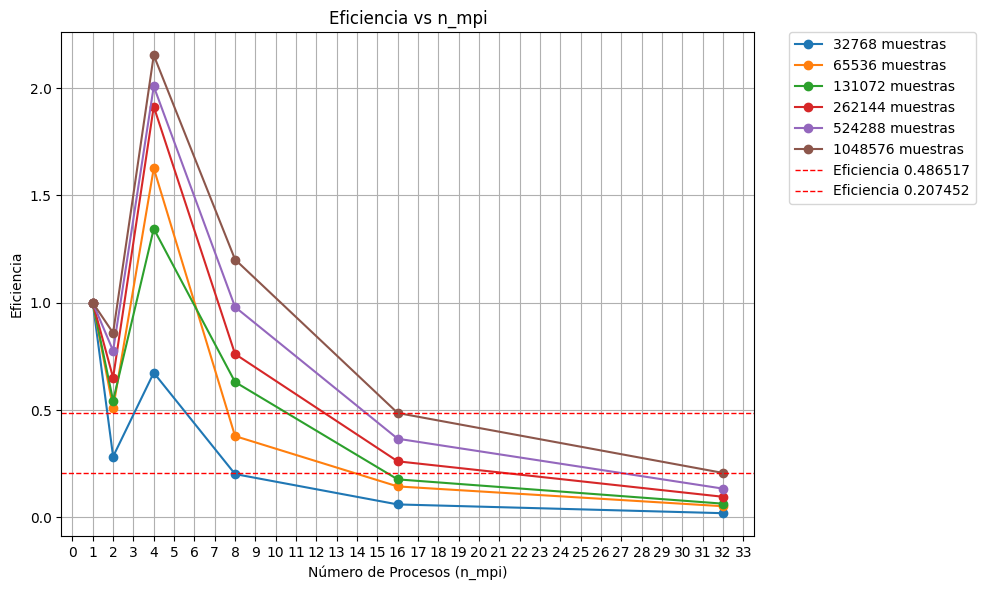

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Crear la figura y ejes ANTES de graficar
fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Si solo quieres un subplot
# Tu código de graficación (modificado para usar axes en lugar de axes[0])
for samples in result_df['n_samples'].unique():
    subset = result_df[result_df['n_samples'] == samples]
    axes.plot(subset['n_mpi'], subset['efficiency'], marker='o', label=f'{samples} muestras')

# Añadir línea horizontal en y=1
axes.axhline(y=0.486517, color='r', linestyle='--', linewidth=1, label='Eficiencia 0.486517')
axes.axhline(y=0.207452, color='r', linestyle='--', linewidth=1, label='Eficiencia 0.207452')

axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

axes.set_xlabel('Número de Procesos (n_mpi)')
axes.set_ylabel('Eficiencia')
#axes.set_yscale('log')
axes.set_title('Eficiencia vs n_mpi')
axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes.grid(True)

# Mostrar la gráfica
plt.tight_layout()

In [ ]:
a = round(1048576/16,1)
b = round(524288/14.5,1)
c = round(262144/12.5,1)
d = round(131072/10.5,1)
e = round(65536/8.6,1)
f = round(32768/6.5,1)
print(f"Para un nivel de efiencia 0.48651, la relación entre n y p (n/p) es:")
print(f"curva de 1048576: {a}, curva de 524288: {b}, curva de 262144: {c}, curva de 131072: {d}, curva de 65536: {e},curva de 32768: {f}")

Para un nivel de efiencia 0.48651, la relación entre n y p (n/p) es:
curva de 1048576: 65536.0, curva de 524288: 36157.8, curva de 262144: 20971.5, curva de 131072: 12483.0, curva de 65536: 7620.5,curva de 32768: 5041.2


In [ ]:
a = round(1048576/32,1)
b = round(524288/27.1,1)
c = round(262144/21.5,1)
d = round(131072/15.5,1)
e = round(65536/13.8,1)
f = round(32768/8,1)
print(f"Para un nivel de efiencia 0.207452, la relación entre n y p (n/p) es:")
print(f"curva de 1048576: {a}, curva de 524288: {b}, curva de 262144: {c}, curva de 131072: {d}, curva de 65536: {e},curva de 32768: {f}")

Para un nivel de efiencia 0.207452, la relación entre n y p (n/p) es:
curva de 1048576: 32768.0, curva de 524288: 19346.4, curva de 262144: 12192.7, curva de 131072: 8456.3, curva de 65536: 4749.0,curva de 32768: 4096.0


In [ ]:
import math

13.8*math.log(13.8)

36.2204265718516

La relación teórica de es que n es proporcional a p *log(p)

Para los 2 casos revisados donde la eficiencia es constante, se observa que la proporción de n/p aumente con n.

In [2]:
import pandas as pd

# Data for efficiency level ~0.48651
n_samples_048 = [32768, 65536, 131072, 262144, 524288, 1048576]
n_p_ratio_048 = [5041.2, 7620.5, 12483.0, 20971.5, 36157.8, 65536.0]
df_efficiency_048 = pd.DataFrame({
    'n_samples': n_samples_048,
    'n_p_ratio': n_p_ratio_048
})

# Data for efficiency level ~0.207452
n_samples_020 = [32768, 65536, 131072, 262144, 524288, 1048576]
n_p_ratio_020 = [4096.0, 4749.0, 8456.3, 12192.7, 19346.4, 32768.0]
df_efficiency_020 = pd.DataFrame({
    'n_samples': n_samples_020,
    'n_p_ratio': n_p_ratio_020
})

print("DataFrame for efficiency ~0.48651:")
print(df_efficiency_048)
print("\nDataFrame for efficiency ~0.207452:")
print(df_efficiency_020)

DataFrame for efficiency ~0.48651:
   n_samples  n_p_ratio
0      32768     5041.2
1      65536     7620.5
2     131072    12483.0
3     262144    20971.5
4     524288    36157.8
5    1048576    65536.0

DataFrame for efficiency ~0.207452:
   n_samples  n_p_ratio
0      32768     4096.0
1      65536     4749.0
2     131072     8456.3
3     262144    12192.7
4     524288    19346.4
5    1048576    32768.0


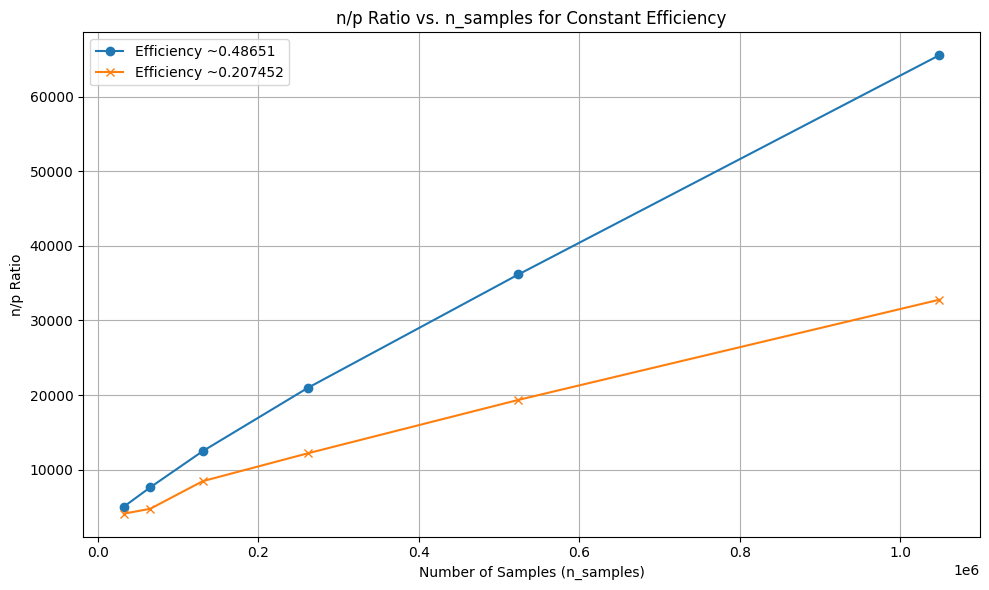

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot for efficiency ~0.48651
plt.plot(df_efficiency_048['n_samples'], df_efficiency_048['n_p_ratio'], marker='o', label='Efficiency ~0.48651')

# Plot for efficiency ~0.207452
plt.plot(df_efficiency_020['n_samples'], df_efficiency_020['n_p_ratio'], marker='x', label='Efficiency ~0.207452')

plt.title('n/p Ratio vs. n_samples for Constant Efficiency')
plt.xlabel('Number of Samples (n_samples)')
plt.ylabel('n/p Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**CLONCLUSIÓN:**


Para mantener una eficiencia constante en un escenario de escalabilidad débil, la carga de trabajo por procesador (ratio n/p) debe aumentar a medida que aumenta el número total de muestras (e implícitamente, el número de procesadores). Esta observación se desvía de la escalabilidad débil ideal, donde el ratio n/p se mantendría constante. Sin embargo, coincide con la relación teórica n y p * log(p), que sugiere que el Ratio n/p debería aumentar con log(p) para mantener la eficiencia. Los datos experimentales respaldan esto, mostrando una tendencia ascendente en n/p a medida que n aumenta, lo que indica que el algoritmo exhibe características consistentes con este comportamiento de escalamiento no ideal, pero teóricamente previsto.